In [ ]:
# 2024-10-29

In [2]:
## 1. NetCDF 파일 읽기 & Data Variables 변수 파악악

import netCDF4 as nc 
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

data = nc.Dataset('F:\BigDataProcessing\KHOA_SST_20231008.nc')
print(data, "\n")
print("\n", list(data.variables),"\n")  # 변수명 표시
print(data['lon'],"\n") # 변수확인
print(data['lat'],"\n")
print(data['time'],"\n")
print(data['sst'],"\n")

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    platform: GK2A, NOAA-20, Terra, GCOM-W1, GPM
    instrument: AMI, VIIRS, MODIS, AMSR2, GMI
    geographic_Element: WGS84
    geographic_crs_name: WGS84, EPSG:4326
    horizontal_datum_name: WGS84
    Time_Standard: UTC
    image_upperleft_latitude: 53.f
    image_lowerright_latitude: 20.f
    image_upperleft_longuitude: 117.f
    image_lowerright_longuitue: 150.f
    geospatial_lat_units: degree
    geospatial_lon_units: degree
    dataset_area: Z003
    source: GK2A_AMI_L2SST, NOAA-20_VIIRS_L2SST, Terra_MODIS_L2SST, GCOM-W1_AMSR2_L2SST, GPM_GMI_L2SST, Insitu_KHOA_SST, Insitu_KMA_SST, Insitu_NIFS_SST
    algorithm: KHOA SST
    algorithm_version: 2.0
    spatial_resolution: 0.01
    geospatial_lat_resolution: 0.01
    geospatial_lon_resolution: 0.01
    temporal_resolution: 1
    spatial_resolution_unit: degree
    temporal_resolution_unit: day
    Number_of_Pixel: 3301*3301
    time_co

In [3]:
## 2. 변수 추출 및 Numpy 배열로 변환

time = data['time'][:].data # 데이터셋에서 'time' 변수를 추출하여 Numpy 배열로 변환
lon = data['lon'][:].data
lat = data['lat'][:].data
sst = data['sst'][:].data
print(sst.shape)    # 이미지 크기 확인

(1, 3301, 3301)


In [4]:
## 3. 데이터 필터링

sst_tmp = sst[sst > -999]  # 'sst' 에서 유효하지 않는 데이터 포인트 필터링
# 필터링한 sst 데이터의 최소, 최댓값 저장
sst_min = np.nanmin(sst_tmp)
sst_max = np.nanmax(sst_tmp)

In [5]:
## 4. 전체 sst의 경위도 범위 확인

print(f'lat: {np.min(lat)}-{np.max(lat)}')  # Lat: 20.0-53.0
print(f'lon: {np.min(lon)}-{np.max(lon)}')  # Lon: 117.0-150.0
print(lon)
print(lat)

lat: 20.0-53.0
lon: 117.0-150.0
[117.   117.01 117.02 ... 149.98 149.99 150.  ]
[20.   20.01 20.02 ... 52.98 52.99 53.  ]


In [6]:
## 5. Time Data 변환

# time' 변수에 대한 설명
time_since_str = data['time'].units     
print(time_since_str,"\n")

# 시작점 문자열 표
time_since_str = time_since_str[12:31]  
print(time_since_str,"\n") 

# 경과시간 (elapsed_hours)
print(time[0],"\n")

# 시작점 + 경과시간 : 실제 시간을 계산하는 부분
time_str = dt.datetime.strptime(time_since_str, '%Y-%m-%d %H:%M:%S') + dt.timedelta(hours=int(time[0]))
print(time_str)

hours since 1900-01-01 00:00:00 UTC 

1900-01-01 00:00:00 

1084932.0 

2023-10-08 12:00:00


In [7]:
## 6. 가시화를 위한 경위도 좌표를 격자 형태로 변환

meshlon, meshlat = np.meshgrid(lon, lat)
print(meshlat.shape, "\n")  # 경도격자 형태
print(meshlon)  # 경도격자
print(meshlat)  # 위도격자

# sst 자료 확인
print(sst,"\n")
print(sst.shape)    # 3차원 : depth(날짜), y(위도), x(경도)

(3301, 3301) 

[[117.   117.01 117.02 ... 149.98 149.99 150.  ]
 [117.   117.01 117.02 ... 149.98 149.99 150.  ]
 [117.   117.01 117.02 ... 149.98 149.99 150.  ]
 ...
 [117.   117.01 117.02 ... 149.98 149.99 150.  ]
 [117.   117.01 117.02 ... 149.98 149.99 150.  ]
 [117.   117.01 117.02 ... 149.98 149.99 150.  ]]
[[20.   20.   20.   ... 20.   20.   20.  ]
 [20.01 20.01 20.01 ... 20.01 20.01 20.01]
 [20.02 20.02 20.02 ... 20.02 20.02 20.02]
 ...
 [52.98 52.98 52.98 ... 52.98 52.98 52.98]
 [52.99 52.99 52.99 ... 52.99 52.99 52.99]
 [53.   53.   53.   ... 53.   53.   53.  ]]
[[[  29.455273   29.566187   29.43843  ...   29.022884   29.137419
     29.047413]
  [  29.403526   29.389912   29.499302 ...   28.725788   29.164991
     29.207325]
  [  29.456654   29.399834   29.319021 ...   29.139576   28.971949
     29.104174]
  ...
  [-999.       -999.       -999.       ...   11.120766   11.408724
     11.148156]
  [-999.       -999.       -999.       ...   11.027427   10.981449
     11.236853]


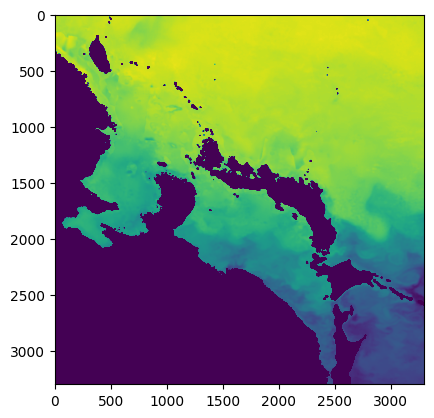

In [8]:
## 7. SST 시각화

# 경도위도 구분 없이 Matrix 개념의 표현!
# x축 & y축 array 개념표현
plt.imshow(sst[0,:,:], vmin=sst_min, vmax=sst_max)
plt.show()

In [9]:
## 8. NetCDF 파일에서 육지 영역 값(_FillValue : -999.0) 추출

v_fill = data['sst']._FillValue     # 육지영역 값
print(f'fill_value: ',v_fill)
# sst[sst == v_fill] = np.nan ---> Land 취급

fill_value:  -999.0


In [10]:
## 9. NetCDF 파일의 data dimension 변경

d, r, c = sst.shape
sst = np.squeeze(sst)
# np.squeeze로 (1,3301,3301) --> (3301, 3301) 차원 변환
print(sst.shape)

(3301, 3301)


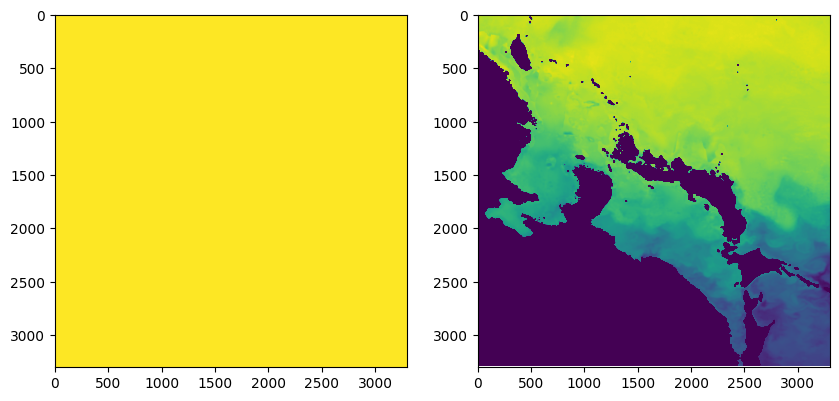

In [11]:
## 10. 영역 추출

bbox = [117, 150, 20, 53]   # 영역구역의 최소경도~최대경도, 최소위도~최대위도

# 경계추출을 위한 Boolean Array 생성
# 지정된 bbox 경계 내에 있는 경위도 값들을 True로 설정
cond = (bbox[0] < meshlon) & (meshlon < bbox[1]) & (bbox[2] < meshlat) & (meshlat < bbox[3])

# 관심 영역만 남기고 나머지 영역의 sst 값을 NaN으로 처리
sst[~cond] = np.nan

# Boolean Array와 관심영역의 해수면 온도 데이터 시각화 (두개의 plot 생성)
fig, ax = plt.subplots(figsize=(10,25), ncols=2)
ax[0].imshow(cond, interpolation='none')    # 첫 번째 subplot에 Boolean Array 시각화
ax[1].imshow(sst, vmin=sst_min, vmax=sst_max)   # 두 번째 subplot에 영역의 해수면 온도 시각화

plt.show()

In [12]:
## 11. 영역이외의 자료 삭제

# 1) 값이 유효한 column, row 조건 생성
cond_x = np.sum(cond, axis=0) != 0  # 지정한 범위 내의 열의 조건 생성 (boolean 형태)
cond_y = np.sum(cond, axis=1) != 0  # 지정한 범위 내의 행의 조건 생성 (boolean 형태)

# 2) 해당 경위도 내의 픽셀의 갯수
# 새로운 row, col 수(유효한 경도 위도 값의 갯수)
rev_r, rev_c = np.sum(cond_x), np.sum(cond_y)
print(rev_r)    # 유효한 행의 수
print(rev_c)    # 유효한 열의 수

# 테두리 삭제
# 3) NaN 값을 제외하고 SST, 경도, 위도 값을 재배열
rev_sst = sst[~np.isnan(sst)].reshape(rev_r, rev_c)
rev_meshlon = meshlon[~np.isnan(sst)].reshape(rev_r, rev_c)
rev_meshlat = meshlat[~np.isnan(sst)].reshape(rev_r, rev_c)

# 테두리 삭제된 자료 크기 확인(관심 영역 부분의 크기 확인)
print(rev_sst.shape,"\n")
print(rev_meshlon.shape,"\n")
print(rev_meshlat.shape,"\n")
print(rev_meshlon,"\n")
print(rev_meshlat,"\n")
print(rev_sst)

3299
3299
(3299, 3299) 

(3299, 3299) 

(3299, 3299) 

[[117.01 117.02 117.03 ... 149.97 149.98 149.99]
 [117.01 117.02 117.03 ... 149.97 149.98 149.99]
 [117.01 117.02 117.03 ... 149.97 149.98 149.99]
 ...
 [117.01 117.02 117.03 ... 149.97 149.98 149.99]
 [117.01 117.02 117.03 ... 149.97 149.98 149.99]
 [117.01 117.02 117.03 ... 149.97 149.98 149.99]] 

[[20.01 20.01 20.01 ... 20.01 20.01 20.01]
 [20.02 20.02 20.02 ... 20.02 20.02 20.02]
 [20.03 20.03 20.03 ... 20.03 20.03 20.03]
 ...
 [52.97 52.97 52.97 ... 52.97 52.97 52.97]
 [52.98 52.98 52.98 ... 52.98 52.98 52.98]
 [52.99 52.99 52.99 ... 52.99 52.99 52.99]] 

[[  29.389912   29.499302   29.405792 ...   29.273422   28.725788
    29.164991]
 [  29.399834   29.319021   29.298101 ...   29.129133   29.139576
    28.971949]
 [  29.334766   29.290125   29.262094 ...   29.141607   29.168142
    29.0737  ]
 ...
 [-999.       -999.       -999.       ...   11.111095   11.121646
    10.996963]
 [-999.       -999.       -999.       ...   11.1

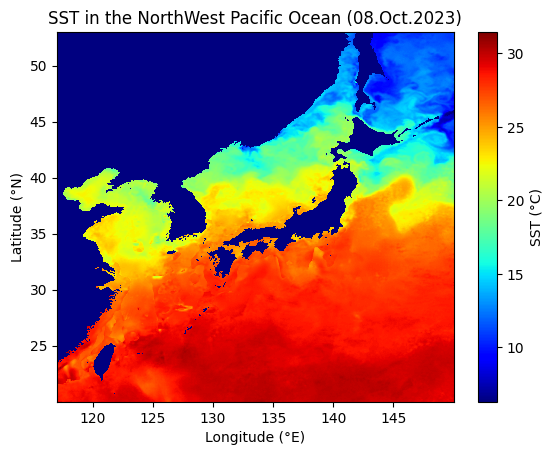

In [13]:
## 12. 가시화 Visualization (데이터 시각화)

plt.figure()
plt.pcolor(rev_meshlon, rev_meshlat, rev_sst, cmap='jet', vmin=sst_min, vmax=sst_max)
plt.colorbar(label='SST (°C)')
plt.xlabel('Longitude (°E)')
plt.ylabel('Latitude (°N)')
plt.title('SST in the NorthWest Pacific Ocean (08.Oct.2023)')
plt.show()

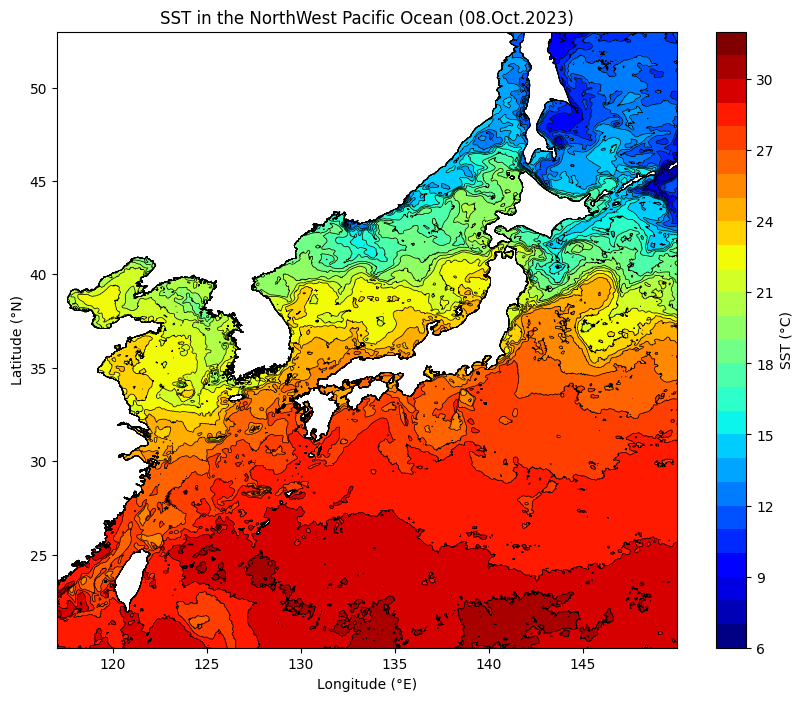

In [14]:
## 등고선 추가

levels = np.arange(np.floor(sst_min), np.ceil(sst_max) + 1, 1) 

plt.figure(figsize=(10,8))

contourf_fill = plt.contourf(rev_meshlon, rev_meshlat, rev_sst, cmap='jet', levels=levels, vmin=sst_min, vmax=sst_max)
plt.colorbar(label='SST (°C)')

contour_line = plt.contour(rev_meshlon, rev_meshlat, rev_sst, colors='black', levels=levels, linewidths=0.5)

plt.xlabel('Longitude (°E)')
plt.ylabel('Latitude (°N)')
plt.title('SST in the NorthWest Pacific Ocean (08.Oct.2023)')
plt.show()

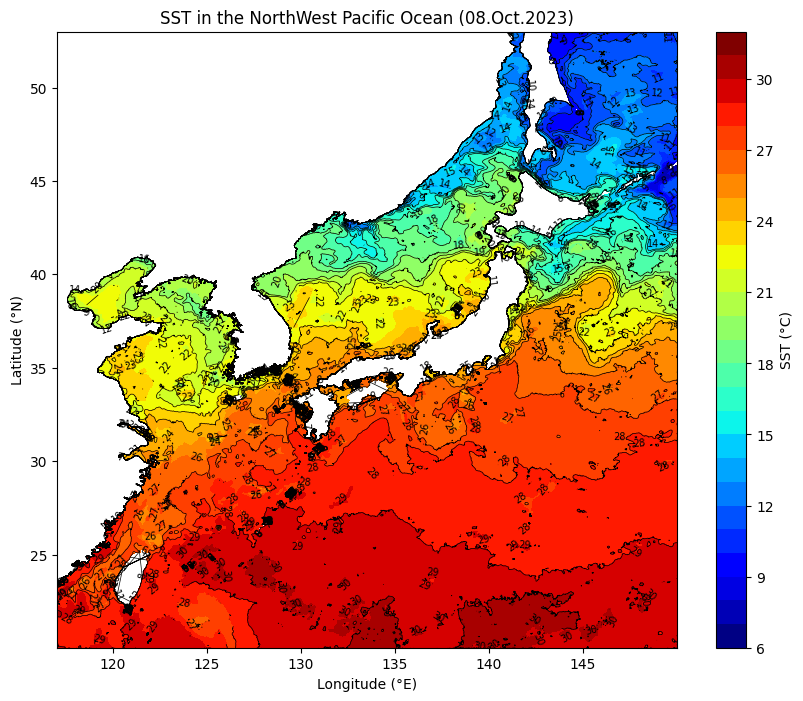

In [15]:
## 등고선에 숫자 라벨 포함

line_levels = np.arange(np.floor(sst_min), np.ceil(sst_max) + 1, 1) 
label_levels = np.arange(np.floor(sst_min), np.ceil(sst_max) + 1, 1) 

plt.figure(figsize=(10,8))

contour_fill = plt.contourf(rev_meshlon, rev_meshlat, rev_sst, cmap='jet', levels=line_levels, vmin=sst_min, vmax=sst_max)
plt.colorbar(label='SST (°C)')

contour_line = plt.contour(rev_meshlon, rev_meshlat, rev_sst, colors='black', levels=label_levels, linewidths=0.5)
plt.clabel(contour_line, inline=True, fontsize=7, fmt='%d', inline_spacing=100)

plt.xlabel('Longitude (°E)')
plt.ylabel('Latitude (°N)')
plt.title('SST in the NorthWest Pacific Ocean (08.Oct.2023)')
plt.show()

과제

1) 등고선 없는거
2) 등고선 있는거
3) 등고선에 숫자 있는거
